In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions import get_fourier_series_approximation

## Periodic Train of Rectangular Pulses

A periodic pulse train is a fundamental signal in digital communications and signal processing. It consists of rectangular pulses that repeat at regular intervals.

Key parameters:
- **T**: Period of repetition
- **τ (tau)**: Pulse width
- **A**: Pulse amplitude
- **Duty cycle**: τ/T (fraction of time the pulse is "on")

In [3]:
# Parameters for rectangular pulse train
T_period = 2.0          # Period of repetition (seconds)
pulse_width = 0.5       # Width of each pulse (seconds)
amplitude = 1.0         # Amplitude of pulses
total_duration = 10.0   # Total time to observe (seconds)
fs = 1000              # Sampling frequency (Hz)

# Create time vector
t_pulse = np.linspace(0, total_duration, int(fs * total_duration), endpoint=False)

def rectangular_pulse_train(t, T, tau, A=1):
    """
    Generate a periodic train of rectangular pulses
    
    Parameters:
    t: time vector
    T: period of repetition
    tau: pulse width
    A: amplitude
    """
    # Create one period of the pulse
    pulse_train = np.zeros_like(t)
    
    # For each time point, determine if it's within a pulse
    for i, time_val in enumerate(t):
        # Find position within current period
        t_mod = time_val % T
        # Check if within pulse width
        if t_mod <= tau:
            pulse_train[i] = A
    
    return pulse_train

# Generate the pulse train
pulse_train = rectangular_pulse_train(t_pulse, T_period, pulse_width, amplitude)

# Calculate duty cycle
duty_cycle = pulse_width / T_period
print(f"Pulse Train Parameters:")
print(f"Period (T): {T_period} s")
print(f"Pulse Width (τ): {pulse_width} s") 
print(f"Duty Cycle: {duty_cycle:.2%}")
print(f"Frequency: {1/T_period:.2f} Hz")

Pulse Train Parameters:
Period (T): 2.0 s
Pulse Width (τ): 0.5 s
Duty Cycle: 25.00%
Frequency: 0.50 Hz


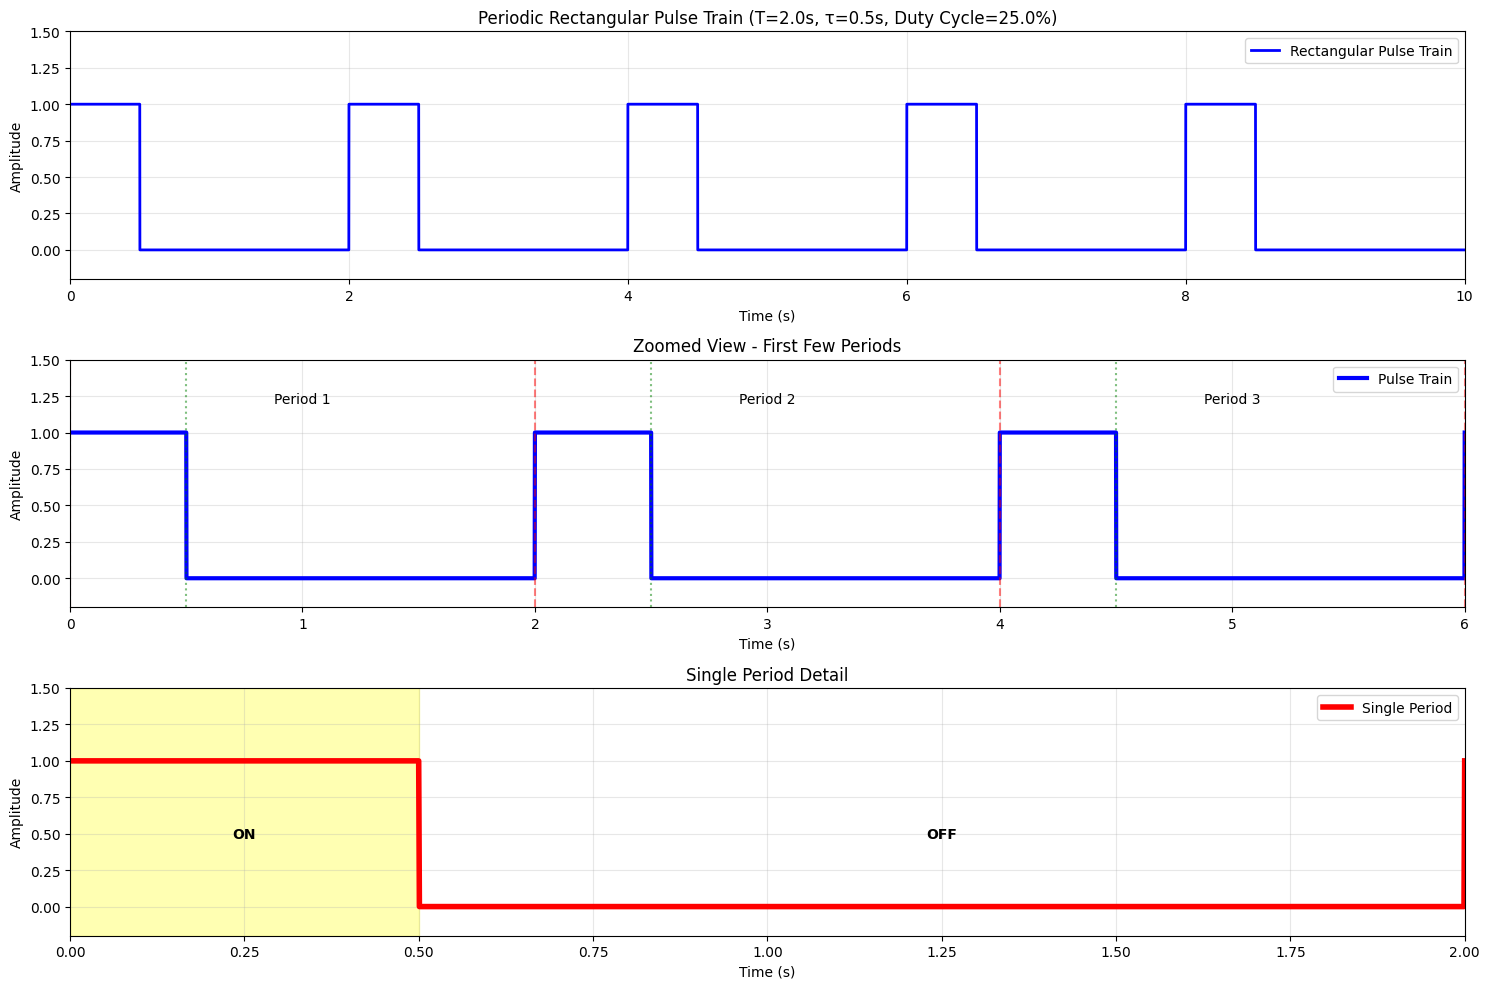


Signal Statistics:
Average value (DC component): 0.251
RMS value: 0.500
Peak-to-peak value: 1.000


In [4]:
# Plot the pulse train
plt.figure(figsize=(15, 10))

# Time domain plot - full duration
plt.subplot(3, 1, 1)
plt.plot(t_pulse, pulse_train, 'b-', linewidth=2, label=f'Rectangular Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Periodic Rectangular Pulse Train (T={T_period}s, τ={pulse_width}s, Duty Cycle={duty_cycle:.1%})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, total_duration)
plt.ylim(-0.2, 1.5)

# Time domain plot - zoomed to show a few periods
plt.subplot(3, 1, 2)
zoom_duration = 6  # Show first 6 seconds
zoom_mask = t_pulse <= zoom_duration
plt.plot(t_pulse[zoom_mask], pulse_train[zoom_mask], 'b-', linewidth=3, label='Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed View - First Few Periods')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, zoom_duration)
plt.ylim(-0.2, 1.5)

# Mark the periods
for i in range(int(zoom_duration/T_period) + 1):
    period_time = i * T_period
    plt.axvline(x=period_time, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=period_time + pulse_width, color='green', linestyle=':', alpha=0.5)
    if i < int(zoom_duration/T_period):
        plt.text(period_time + T_period/2, 1.2, f'Period {i+1}', ha='center', fontsize=10)

# Single period detail
plt.subplot(3, 1, 3)
single_period_mask = t_pulse <= T_period
plt.plot(t_pulse[single_period_mask], pulse_train[single_period_mask], 'r-', linewidth=4, label='Single Period')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Single Period Detail')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, T_period)
plt.ylim(-0.2, 1.5)

# Mark pulse width
plt.axvspan(0, pulse_width, alpha=0.3, color='yellow', label=f'Pulse Width = {pulse_width}s')
plt.text(pulse_width/2, 0.5, 'ON', ha='center', va='center', fontweight='bold')
plt.text(pulse_width + (T_period-pulse_width)/2, 0.5, 'OFF', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSignal Statistics:")
print(f"Average value (DC component): {np.mean(pulse_train):.3f}")
print(f"RMS value: {np.sqrt(np.mean(pulse_train**2)):.3f}")
print(f"Peak-to-peak value: {np.max(pulse_train) - np.min(pulse_train):.3f}")

Using r = 40 harmonics
A0 (DC term) = 0.25050
k=  1: Ak = +0.31881, Bk = +0.31881
k=  2: Ak = +0.00000, Bk = +0.31831
k=  3: Ak = -0.10560, Bk = +0.10560
k=  4: Ak = +0.00100, Bk = -0.00000
k=  5: Ak = +0.06416, Bk = +0.06416
k=  6: Ak = +0.00000, Bk = +0.10610
k=  7: Ak = -0.04497, Bk = +0.04497
k=  8: Ak = +0.00100, Bk = +0.00000
k=  9: Ak = +0.03587, Bk = +0.03587
k= 10: Ak = +0.00000, Bk = +0.06366
k= 40: Ak = +0.00100, Bk = -0.00000


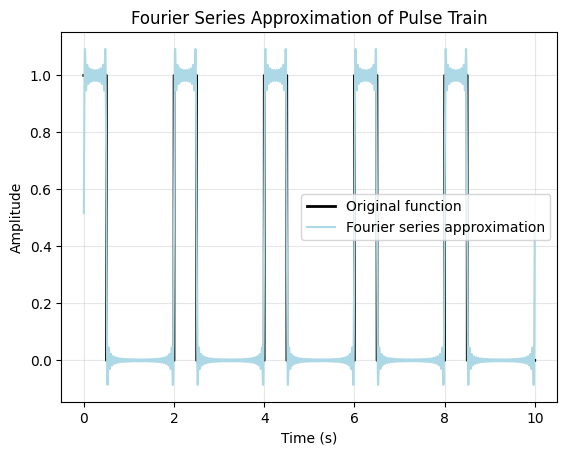

In [5]:
fFS = get_fourier_series_approximation(f=pulse_train, x=t_pulse, L=T_period, r=40)

plt.figure()
plt.plot(t_pulse, pulse_train, color='k', label='Original function', linewidth=2)
plt.plot(t_pulse, fFS, color='#add8e6ff', label='Fourier series approximation', linewidth=1.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fourier Series Approximation of Pulse Train')
plt.show()